In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 



Bad key "text.kerning_factor" on line 4 in
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [137]:
df = pd.read_sql_query('''select * from d60_90_flag;''', cnx)

In [138]:
df.shape

(426207, 27)

In [5]:
df.columns

Index(['loan_identifier', 'origination_channel', 'seller_name',
       'original_interest_rate', 'original_upb', 'original_loan_term',
       'origination_date', 'first_payment_date', 'original_ltv',
       'original_cltv', 'number_of_borrowers', 'original_dti',
       'borrower_credit_score_orig', 'first_time_home_buyer', 'loan_purpose',
       'property_type', 'number_of_units', 'occupancy_type', 'property_state',
       'zip_code_short', 'primary_mortgage_insurance_percent', 'product_type',
       'coborrower_credit_score_orig', 'mortgage_insurance_type',
       'relocation_mortgage', 'd90_flag', 'd60_flag'],
      dtype='object')

In [19]:
df.d90_flag.value_counts()

0    423360
1      2847
Name: d90_flag, dtype: int64

continues: 'original_interest_rate', 'original_upb','original_ltv',
       'original_cltv','original_dti','borrower_credit_score_orig','primary_mortgage_insurance_percent',

categorical: 'origination_channel','original_loan_term','number_of_borrowers','first_time_home_buyer', 'loan_purpose', 'property_type', 'number_of_units','occupancy_type', 'property_state','mortgage_insurance_type',
       'relocation_mortgage'

In [30]:
d60 = pd.read_csv('2018Q1/d60.csv')

In [35]:
d90 = pd.read_csv('2018Q1/d90.csv')

In [31]:
d60.columns

Index(['loan_identifier', 'original_upb', 'current_actual_upb', 'loan_age',
       'current_loan_delinquency_status', 'upb_percent'],
      dtype='object')

Text(0.5, 1.0, 'd60 current_upb/original_upb')

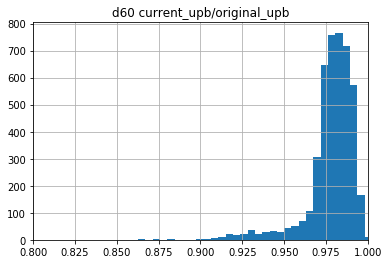

In [41]:
d60['upb_percent'].hist(bins=100)
plt.xlim(0.8,1.0)
plt.title('d60 current_upb/original_upb')

Text(0.5, 1.0, 'd90 current_upb/original_upb')

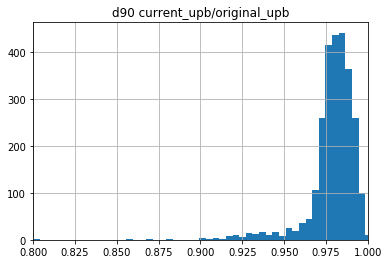

In [42]:
d90['upb_percent'].hist(bins=100)
plt.xlim(0.8,1.0)
plt.title('d90 current_upb/original_upb')

## delinquency

### bivariate analysis

#### continues variables

In [11]:
continous_cols = ['original_interest_rate', 'original_upb','original_ltv',
       'original_cltv','original_dti','borrower_credit_score_orig',
                  'primary_mortgage_insurance_percent']

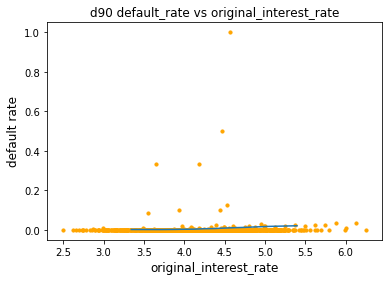

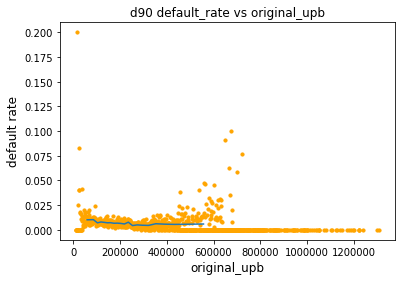

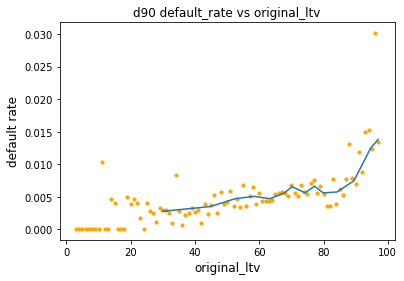

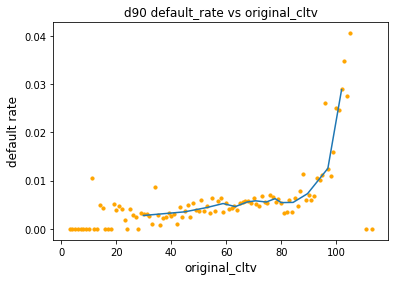

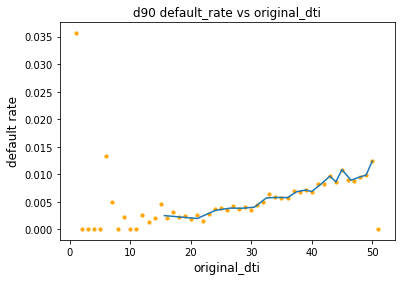

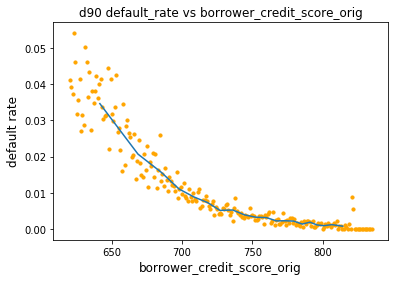

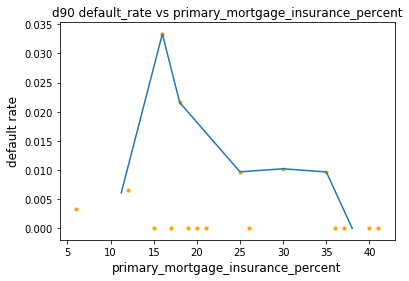

In [13]:
# study relationship of count and continous variables
#d90
for col in continous_cols:
    plt.subplot(111)
    a = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'd90_flag']].mean()
    plt.plot(a[col],a['d90_flag'])
    
    b = df.groupby([col],as_index=False)[['d90_flag']].mean()
    plt.scatter(b[col],b['d90_flag'],color='orange', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 default_rate vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('default rate',fontsize =12)
    plt.show()
    #plt.plot(grouped_df.index, grouped_df.values)

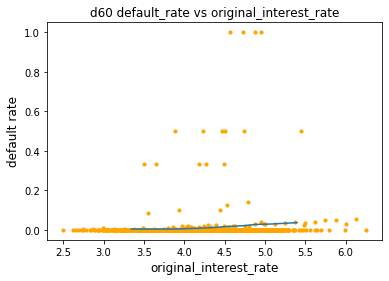

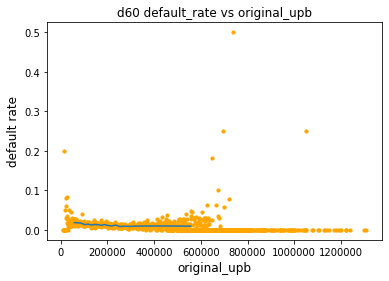

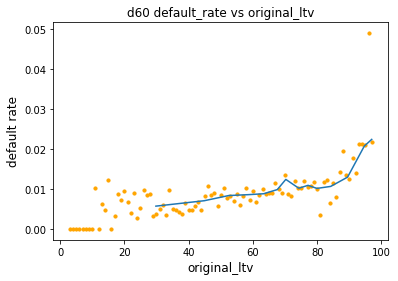

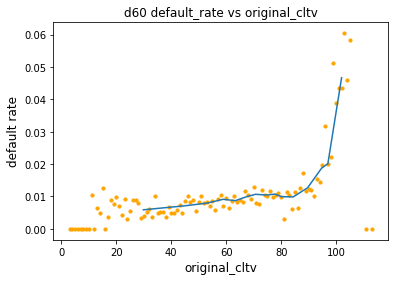

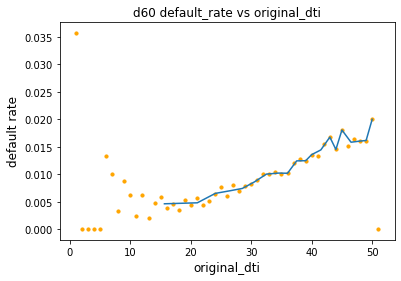

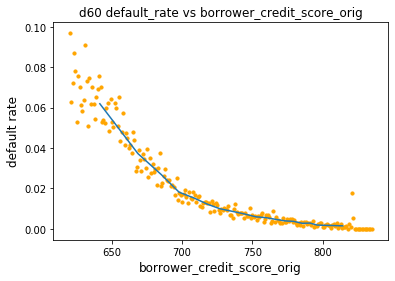

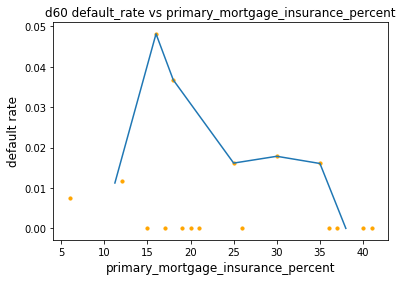

In [15]:
#d60
for col in continous_cols:
    plt.subplot(111)
    a = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'd60_flag']].mean()
    plt.plot(a[col],a['d60_flag'])
    
    b = df.groupby([col],as_index=False)[['d60_flag']].mean()
    plt.scatter(b[col],b['d60_flag'],color='orange', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d60 default_rate vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('default rate',fontsize =12)
    plt.show()
    #plt.plot(grouped_df.index, grouped_df.values)

#### categorial 

In [23]:
categorical_cols = ['origination_channel','original_loan_term','number_of_borrowers',
                    'first_time_home_buyer', 'loan_purpose', 'property_type', 
                    'number_of_units','occupancy_type', 'property_state',
                    'mortgage_insurance_type','relocation_mortgage']

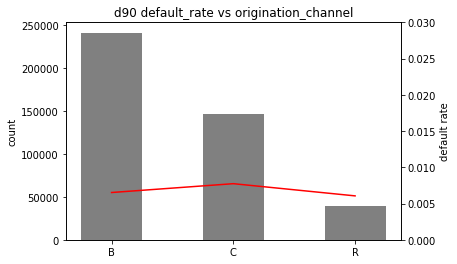

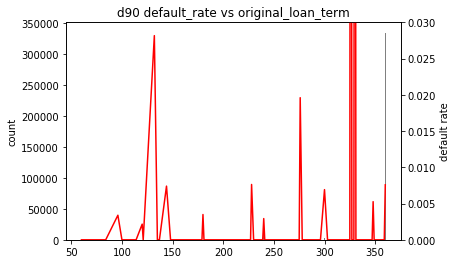

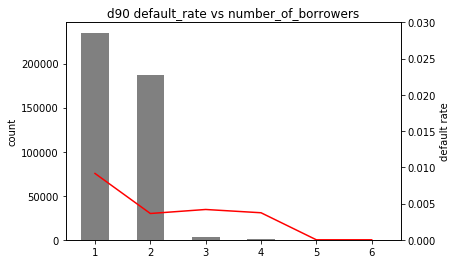

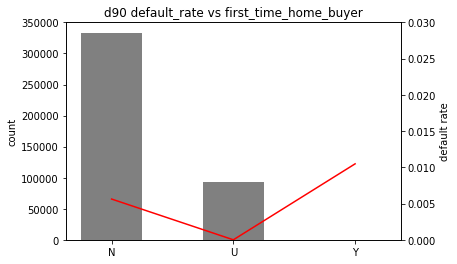

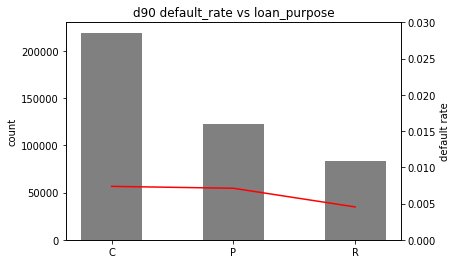

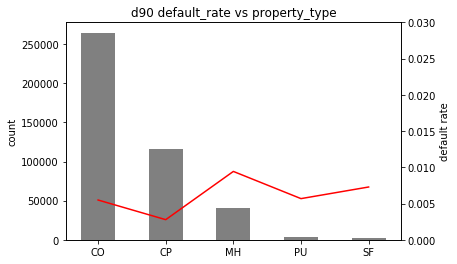

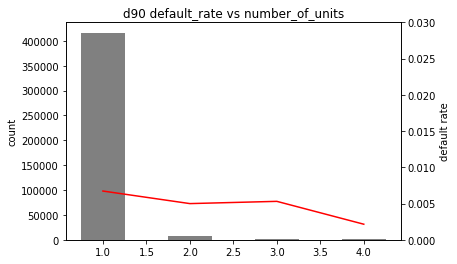

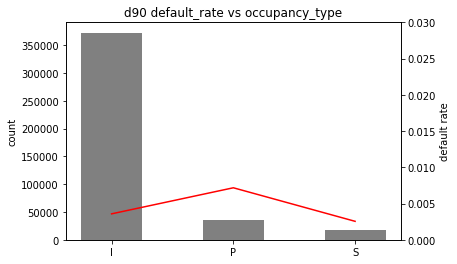

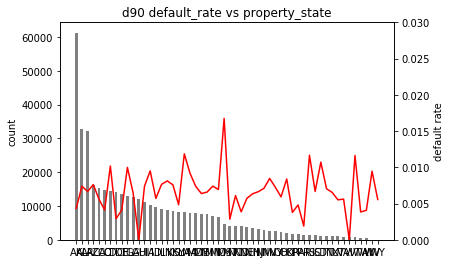

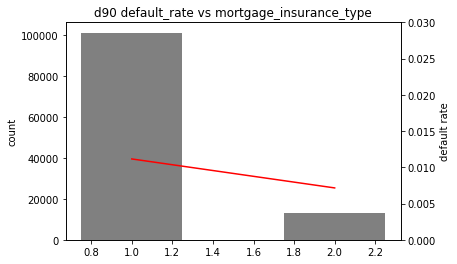

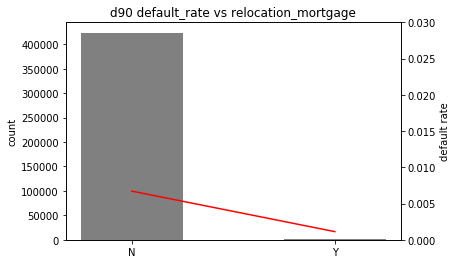

In [28]:
# study relationship of default rate and categorical variables
#d90

for col in categorical_cols:
    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    d = df[col].value_counts()
    ax1.bar(d.index,d, color = 'grey', width = 0.5)
    ax1.set_ylabel('count')
    
    ax2 = ax1.twinx()
    c = df.groupby([col],as_index=False)[['d90_flag']].mean()
    ax2.plot(c[col],c['d90_flag'],color='red')
    ax2.set_ylim([0, 0.03])
    ax2.set_ylabel('default rate')
    
    plt.title("d90 default_rate vs " + col)
    plt.xlabel(col, fontsize =12)

    plt.show()
    #sns.catplot(x=col, y="d90_flag", data=c, legend = True)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")

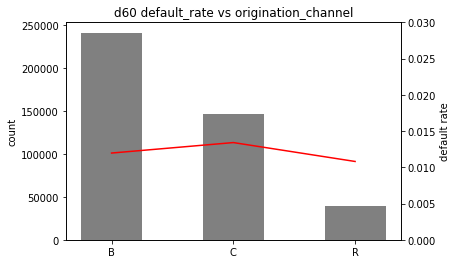

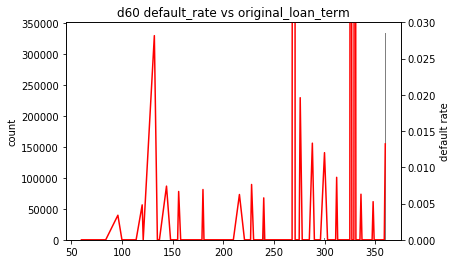

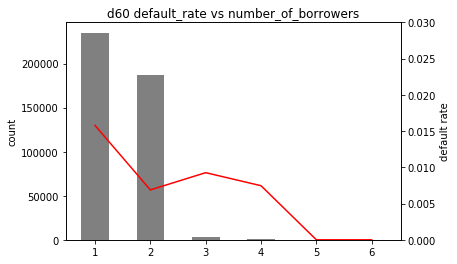

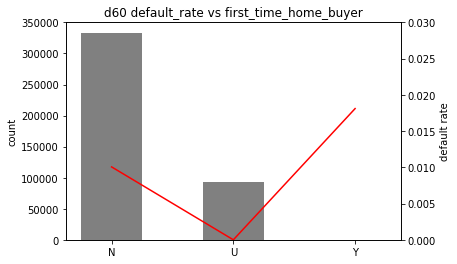

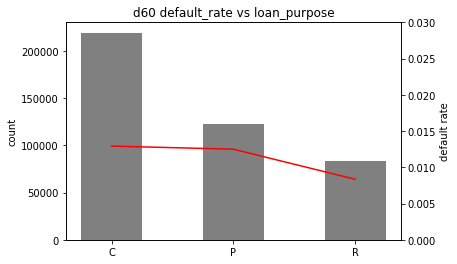

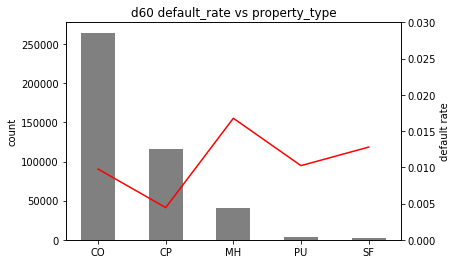

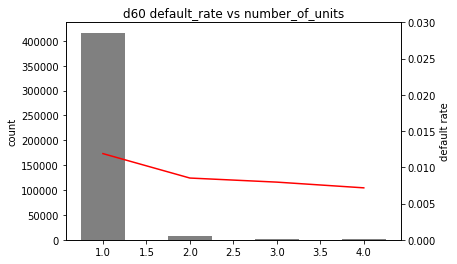

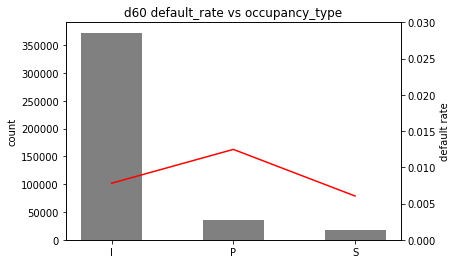

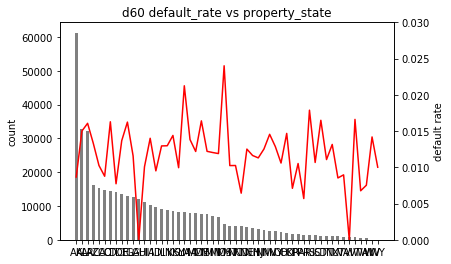

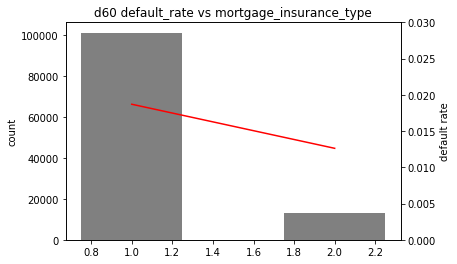

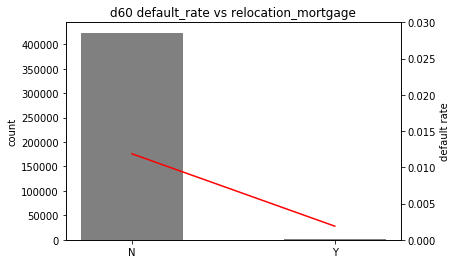

In [29]:
#d60

for col in categorical_cols:
    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    d = df[col].value_counts()
    ax1.bar(d.index,d, color = 'grey', width = 0.5)
    ax1.set_ylabel('count')
    
    ax2 = ax1.twinx()
    c = df.groupby([col],as_index=False)[['d60_flag']].mean()
    ax2.plot(c[col],c['d60_flag'],color='red')
    ax2.set_ylim([0, 0.03])
    ax2.set_ylabel('default rate')
    
    plt.title("d60 default_rate vs " + col)
    plt.xlabel(col, fontsize =12)

    plt.show()
    #sns.catplot(x=col, y="d90_flag", data=c, legend = True)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")

### multivariate analysis - d90 against calender month in different groups

In [139]:
df_d90 = pd.read_sql_query('''select pf.loan_identifier, pf.monthly_reporting_period, 
		case when pf.current_loan_delinquency_status in ('0','1','2') then 0
			 when pf.current_loan_delinquency_status not in ('0','1','2','X') then 1
			 else null
			 end as d90_flag_pf,
		sch.ori_int_group, sch.fico_group, sch.dti_group, sch.ltv_group
from fannie_performance pf left join schedule_curtail_paidoff sch 
		on pf.loan_identifier = sch.loan_identifier 
			and pf.monthly_reporting_period = sch.monthly_reporting_period;''', cnx)

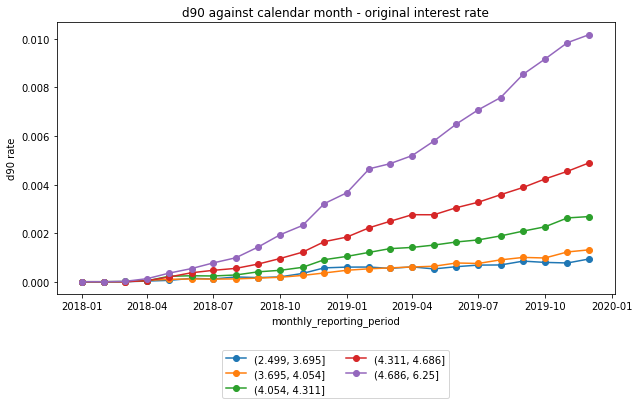

In [140]:
pd.pivot_table(df_d90, values = 'd90_flag_pf', aggfunc = 'mean',
               columns = 'ori_int_group', index = 'monthly_reporting_period').plot(style = '-o',figsize=(10, 5))
plt.ylabel('d90 rate', fontsize=10)
plt.title('d90 against calendar month - original interest rate')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2, fancybox=True)

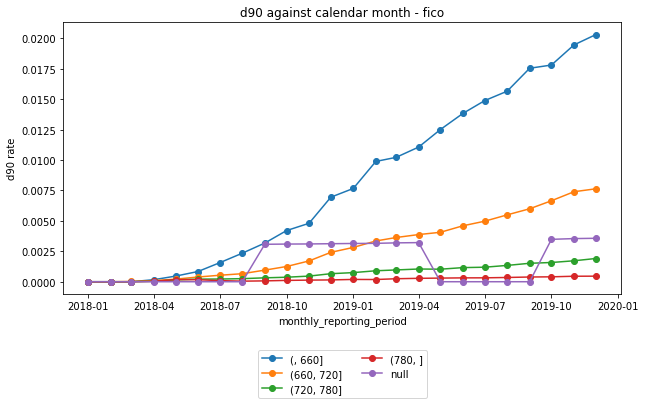

In [141]:
pd.pivot_table(df_d90, values = 'd90_flag_pf', aggfunc = 'mean',
               columns = 'fico_group', index = 'monthly_reporting_period').plot(style = '-o',figsize=(10, 5))
plt.ylabel('d90 rate', fontsize=10)
plt.title('d90 against calendar month - fico')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2, fancybox=True)

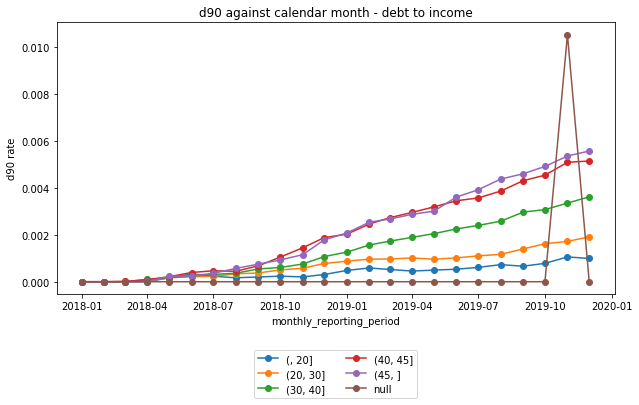

In [142]:
pd.pivot_table(df_d90, values = 'd90_flag_pf', aggfunc = 'mean',
               columns = 'dti_group', index = 'monthly_reporting_period').plot(style = '-o',figsize=(10, 5))
plt.ylabel('d90 rate', fontsize=10)
plt.title('d90 against calendar month - debt to income')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2, fancybox=True)

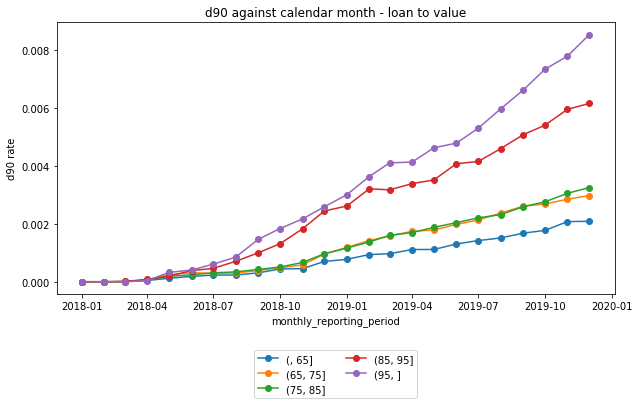

In [143]:
pd.pivot_table(df_d90, values = 'd90_flag_pf', aggfunc = 'mean',
               columns = 'ltv_group', index = 'monthly_reporting_period').plot(style = '-o',figsize=(10, 5))
plt.ylabel('d90 rate', fontsize=10)
plt.title('d90 against calendar month - loan to value')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2, fancybox=True)

## CPR

In [70]:
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt 

%matplotlib inline

In [64]:
from sqlalchemy import create_engine 
# Postgres username, password, and database name 
POSTGRES_ADDRESS = 'localhost' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY 
POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'jingsixu' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = 'wohenbang828' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD POSTGRES_DBNAME = 'database' ## CHANGE THIS TO YOUR DATABASE NAME
POSTGRES_DBNAME = 'Fannie' ## CHANGE THIS TO YOUR DATABASE NAME 
# A long string that contains the necessary Postgres login information 
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
              .format(username=POSTGRES_USERNAME, 
               password=POSTGRES_PASSWORD, 
               ipaddress=POSTGRES_ADDRESS, 
               port=POSTGRES_PORT, 
               dbname=POSTGRES_DBNAME)) 
# Create the connection 
cnx = create_engine(postgres_str)

In [123]:
cpr_reportMon = pd.read_sql_query('''SELECT * FROM cpr_compare_cp;''', cnx)

In [67]:
cpr_reportMon.columns

Index(['monthly_reporting_period', 'cpr1', 'cpr2'], dtype='object')

Text(0.5, 1.0, 'report_monthly CPR 2018Q1')

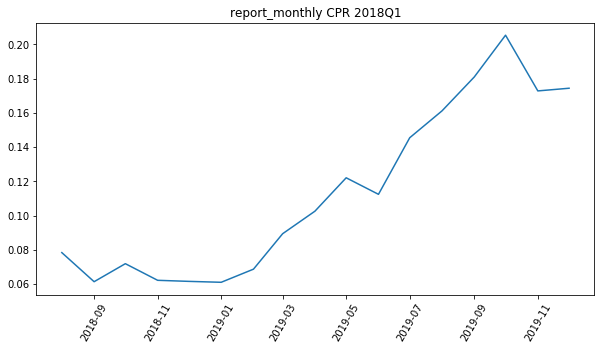

In [124]:
plt.figure(figsize=(10,5))
plt.plot(cpr_reportMon['monthly_reporting_period'],cpr_reportMon['cpr1'])
plt.xticks(rotation=60)
plt.title('report_monthly CPR 2018Q1')

### bivariate anlysis - CPR against Economic index

#### HPI

In [125]:
hpi = pd.read_sql_query('''select cpr.monthly_reporting_period, cpr.cpr1, hpi.index_nsa, hpi.index_sa
from cpr_compare_cp cpr left join 
	(select report_time, avg(index_nsa)as index_nsa, avg(index_sa) as index_sa
	 from fhfahpi
	 group by report_time) as hpi on cpr.monthly_reporting_period = hpi.report_time;''',cnx)

Text(0.5, 1.0, 'CPR against hpi_adjusted')

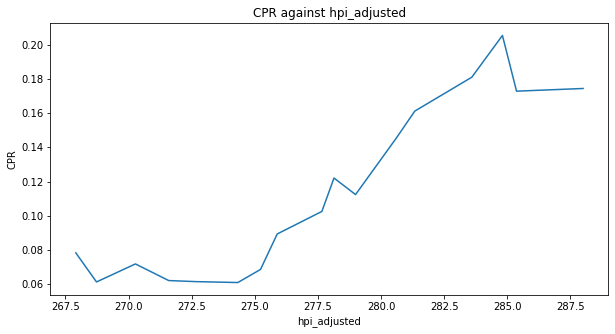

In [127]:
plt.figure(figsize=(10,5))
plt.plot(hpi.index_sa, hpi.cpr1)
plt.xlabel('hpi_adjusted')
plt.ylabel('CPR')
plt.title('CPR against hpi_adjusted')

Text(0.5, 1.0, 'CPR against hpi_non-adjusted')

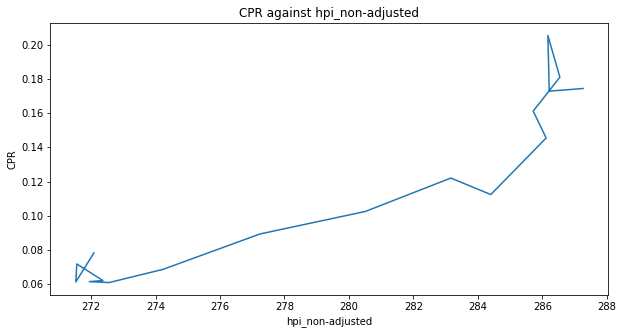

In [128]:
plt.figure(figsize=(10,5))
p
plt.title('CPR against hpi_non-adjustlt.plot(hpi.index_nsa, hpi.cpr1)
plt.xlabel('hpi_non-adjusted')
plt.ylabel('CPR')ed')

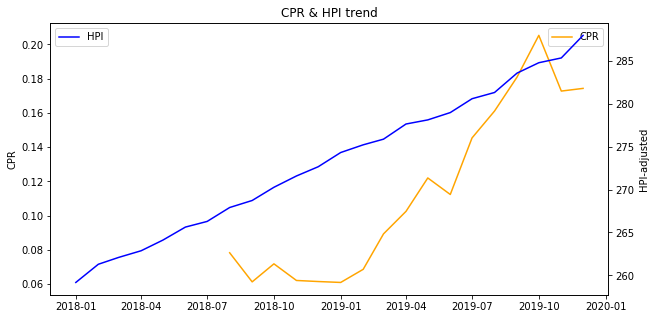

In [136]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(111)
ax1.plot(hpi['monthly_reporting_period'],hpi.cpr1, color = 'orange', label = 'CPR')
ax1.set_ylabel('CPR')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(hpi['monthly_reporting_period'],hpi.index_sa, color = 'blue', label = 'HPI')
ax2.set_ylabel('HPI-adjusted') 
plt.legend()

#plt.legend(handles=[ax1, ax2])
plt.xlabel('monthly_reporting_period')
plt.title('CPR & HPI trend')
plt.show()

#### FHLMC30Y

In [156]:
fh30 = pd.read_sql_query('''select cpr.monthly_reporting_period, cpr.cpr1, fh.FHLMC30Y
from cpr_compare_cp cpr left join FHLMC30Y fh on cpr.monthly_reporting_period = fh.month;''',cnx)

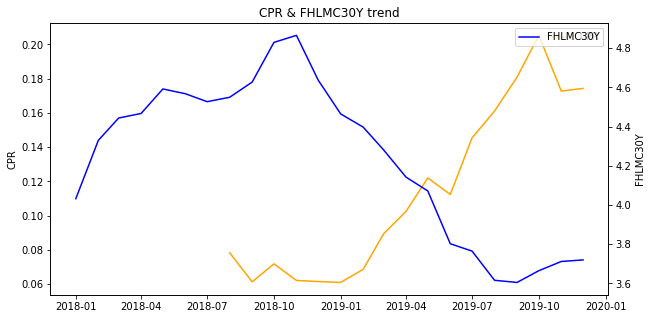

In [161]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(111)
ax1.plot(fh30['monthly_reporting_period'],fh30.cpr1, color = 'orange', label = 'CPR')
ax1.set_ylabel('CPR')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(fh30['monthly_reporting_period'],fh30.fhlmc30y, color = 'blue', label = 'FHLMC30Y')
ax2.set_ylabel('FHLMC30Y') 
plt.legend()

#plt.legend(handles=[ax1, ax2])
plt.xlabel('monthly_reporting_period')
plt.title('CPR & FHLMC30Y trend')
plt.show()

Text(0.5, 1.0, 'CPR against FHLMC30Y')

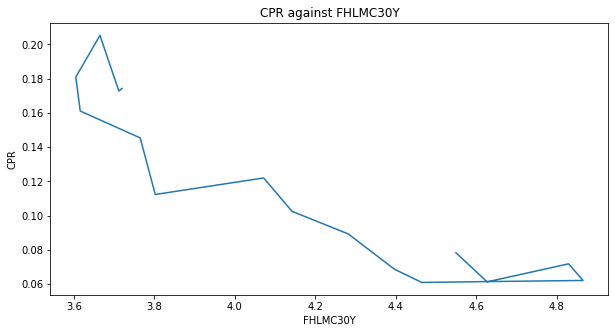

In [160]:
plt.figure(figsize=(10,5))
plt.plot(fh30.fhlmc30y, fh30.cpr1)
plt.xlabel('FHLMC30Y')
plt.ylabel('CPR')
plt.title('CPR against FHLMC30Y')

### multivariate analysis - CPR against Calendar month in different groups

#### original interest rate

In [72]:
a = pd.read_sql_query('''select original_interest_rate, count(loan_identifier), avg(smm)
from schedule_curtail_paidoff
group by original_interest_rate;''',cnx)

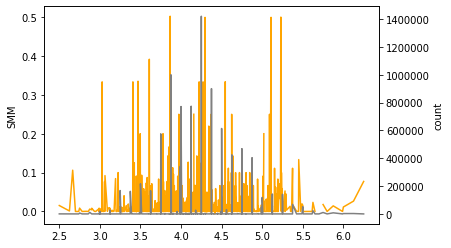

In [75]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(a['original_interest_rate'],a.avg, color = 'orange')
ax1.set_ylabel('SMM')

ax2 = ax1.twinx()
ax2.plot(a['original_interest_rate'],a['count'], color = 'grey')
ax2.set_ylabel('count') 

plt.xlabel('original_interest_rate')
plt.show()

I will divide interest rate into 5 groups. 2.5 -6.25

In [78]:
pd.qcut(a.original_interest_rate, 5).value_counts() 

(4.686, 6.25]     194
(2.499, 3.695]    194
(4.311, 4.686]    193
(4.054, 4.311]    193
(3.695, 4.054]    193
Name: original_interest_rate, dtype: int64

In [79]:
orig_int_cpr = pd.read_sql_query('''SELECT * FROM orig_int_cpr;''', cnx)

Text(0.5, 1.0, 'CPR against calendar month - original interesr rate groups')

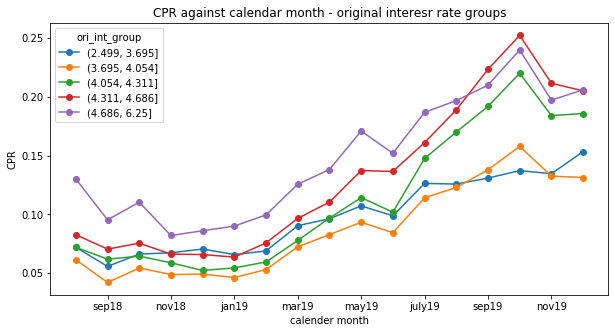

In [110]:

orig_int_cpr.set_index('ori_int_group').T.plot(style = '-o',figsize=(10, 5))
plt.xlabel('calender month')
plt.ylabel('CPR')
plt.title('CPR against calendar month - original interesr rate groups')

#### credit score

In [96]:
b = pd.read_sql_query('''select ac.borrower_credit_score_orig, count(sch.loan_identifier), avg(sch.smm)
from schedule_curtail_paidoff sch left join fannie_acquisition ac on ac.loan_identifier = sch.loan_identifier
group by 1;''',cnx)

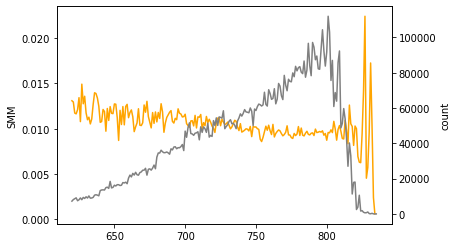

In [103]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(b['borrower_credit_score_orig'],b.avg, color = 'orange')
ax1.set_ylabel('SMM')

ax2 = ax1.twinx()
ax2.plot(b['borrower_credit_score_orig'],b['count'], color = 'grey')
ax2.set_ylabel('count') 

plt.xlabel('borrower_credit_score_orig')
plt.show()

<660, 660-720, 720-780, >780

In [104]:
fico_cpr = pd.read_sql_query('''SELECT * FROM fico_cpr;''', cnx)

Text(0.5, 1.0, 'CPR against calendar month - fico groups')

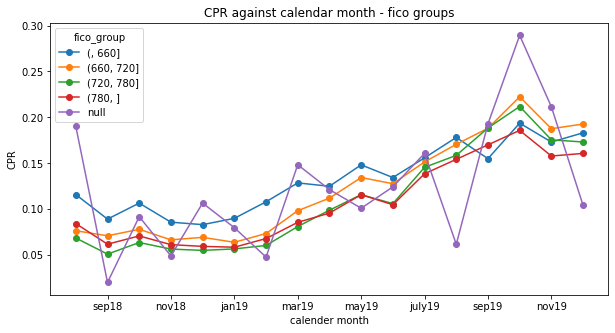

In [109]:

fico_cpr.set_index('fico_group').T.plot(style = '-o', figsize=(10, 5))
plt.xlabel('calender month')
plt.ylabel('CPR')
plt.title('CPR against calendar month - fico groups')

#### debt to income

In [111]:
c = pd.read_sql_query('''select ac.original_dti, count(sch.loan_identifier), avg(sch.smm)
from schedule_curtail_paidoff sch left join fannie_acquisition ac on ac.loan_identifier = sch.loan_identifier
group by 1;''',cnx)

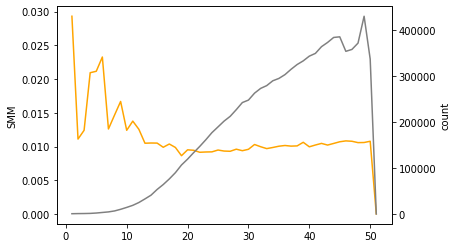

In [112]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(c['original_dti'],c.avg, color = 'orange')
ax1.set_ylabel('SMM')

ax2 = ax1.twinx()
ax2.plot(c['original_dti'],c['count'], color = 'grey')
ax2.set_ylabel('count') 

plt.xlabel('original_dti')
plt.show()

In [113]:
dti_cpr = pd.read_sql_query('''SELECT * FROM dti_cpr;''', cnx)

Text(0.5, 1.0, 'CPR against calendar month - dti groups')

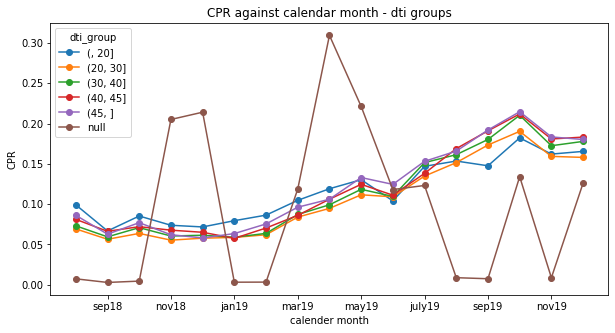

In [116]:
dti_cpr.set_index('dti_group').T.plot(style = '-o', figsize=(10, 5))
plt.xlabel('calender month')
plt.ylabel('CPR')
plt.title('CPR against calendar month - dti groups')

Text(0.5, 1.0, 'CPR against calendar month - dti groups')

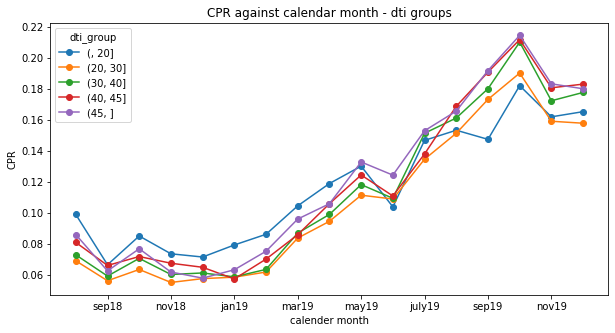

In [121]:
dti_cpr.iloc[:5].set_index('dti_group').T.plot(style = '-o', figsize=(10, 5))
plt.xlabel('calender month')
plt.ylabel('CPR')
plt.title('CPR against calendar month - dti groups')

#### ltv

In [163]:
ltv_cpr = pd.read_sql_query('''SELECT * FROM ltv_cpr;''', cnx)

Text(0.5, 1.0, 'CPR against calendar month - ltv groups')

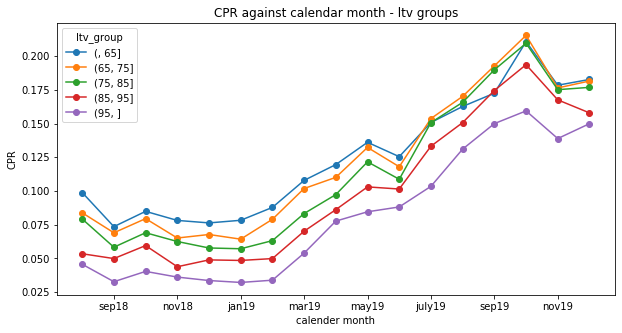

In [164]:
ltv_cpr.set_index('ltv_group').T.plot(style = '-o', figsize=(10, 5))
plt.xlabel('calender month')
plt.ylabel('CPR')
plt.title('CPR against calendar month - ltv groups')

### CPR against month on Fannie book

In [144]:
a1 = pd.read_sql_query('''select *
from crosstab(
	 'select ori_int_group, month_onbook, (1-(1-(sum(smm)/count(smm)))^12) as CPR 
	  from schedule_curtail_paidoff2
	  group by 1,2
	  order by 1,2')
as cp(ori_int_group varchar, _1 float8, _2 float8, _3 float8,
					_4 float8, _5 float8, _6 float8, _7 float8,
					_8 float8, _9 float8, _10 float8, _11 float8,
					_12 float8, _13 float8, _14 float8, _15 float8,
					_16 float8, _17 float8, _18 float8, _19 float8,
					_20 float8, _21 float8, _22 float8, _23 float8,
					_24 float8);''', cnx)

Text(0.5, 1.0, 'CPR against month on book - original interesr rate groups')

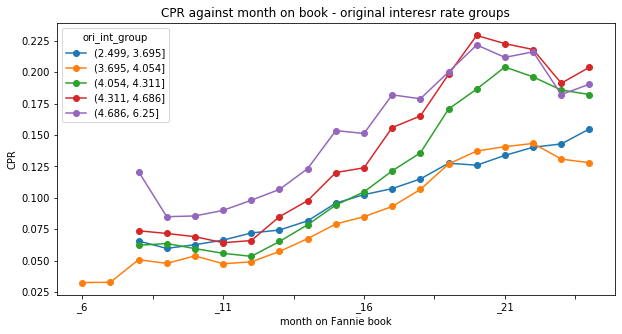

In [145]:
a1.set_index('ori_int_group').T.plot(style = '-o',figsize=(10, 5))
plt.xlabel('month on Fannie book')
plt.ylabel('CPR')
plt.title('CPR against month on book - original interesr rate groups')

In [149]:
fico_cprB = pd.read_sql_query('''select *
from crosstab(
	 'select fico_group, month_onbook, (1-(1-(sum(smm)/count(smm)))^12) as CPR 
	  from schedule_curtail_paidoff2
	  group by 1,2
	  order by 1,2')
as cp(fico_group varchar, _1 float8, _2 float8, _3 float8,
					_4 float8, _5 float8, _6 float8, _7 float8,
					_8 float8, _9 float8, _10 float8, _11 float8,
					_12 float8, _13 float8, _14 float8, _15 float8,
					_16 float8, _17 float8, _18 float8, _19 float8,
					_20 float8, _21 float8, _22 float8, _23 float8,
					_24 float8);''', cnx)

Text(0.5, 1.0, 'CPR against month on book - fico groups')

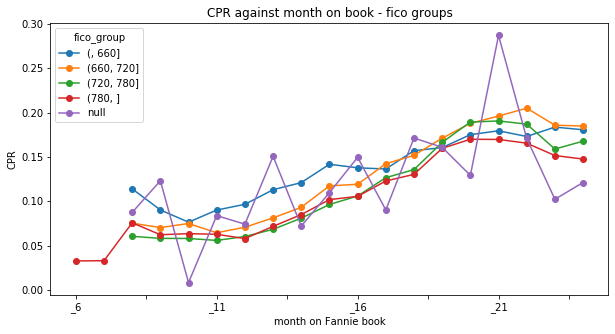

In [150]:
fico_cprB.set_index('fico_group').T.plot(style = '-o',figsize=(10, 5))
plt.xlabel('month on Fannie book')
plt.ylabel('CPR')
plt.title('CPR against month on book - fico groups')

In [151]:
dti_cprB = pd.read_sql_query('''select *
from crosstab(
	 'select dti_group, month_onbook, (1-(1-(sum(smm)/count(smm)))^12) as CPR 
	  from schedule_curtail_paidoff2
	  group by 1,2
	  order by 1,2')
as cp(dti_group varchar, _1 float8, _2 float8, _3 float8,
					_4 float8, _5 float8, _6 float8, _7 float8,
					_8 float8, _9 float8, _10 float8, _11 float8,
					_12 float8, _13 float8, _14 float8, _15 float8,
					_16 float8, _17 float8, _18 float8, _19 float8,
					_20 float8, _21 float8, _22 float8, _23 float8,
					_24 float8);''', cnx)

Text(0.5, 1.0, 'CPR against month on book - debt to income groups')

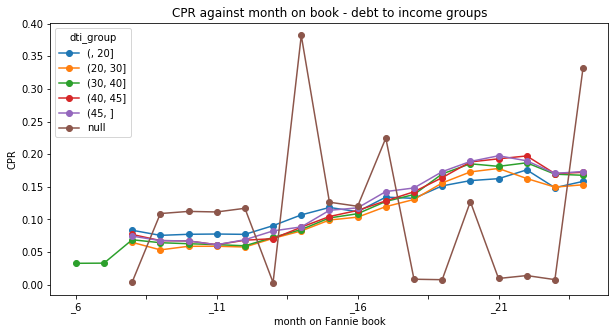

In [152]:
dti_cprB.set_index('dti_group').T.plot(style = '-o',figsize=(10, 5))
plt.xlabel('month on Fannie book')
plt.ylabel('CPR')
plt.title('CPR against month on book - debt to income groups')

In [153]:
ltv_cprB = pd.read_sql_query('''select *
from crosstab(
	 'select ltv_group, month_onbook, (1-(1-(sum(smm)/count(smm)))^12) as CPR 
	  from schedule_curtail_paidoff2
	  group by 1,2
	  order by 1,2')
as cp(ltv_group varchar, _1 float8, _2 float8, _3 float8,
					_4 float8, _5 float8, _6 float8, _7 float8,
					_8 float8, _9 float8, _10 float8, _11 float8,
					_12 float8, _13 float8, _14 float8, _15 float8,
					_16 float8, _17 float8, _18 float8, _19 float8,
					_20 float8, _21 float8, _22 float8, _23 float8,
					_24 float8);''', cnx)

Text(0.5, 1.0, 'CPR against month on book - loan to value groups')

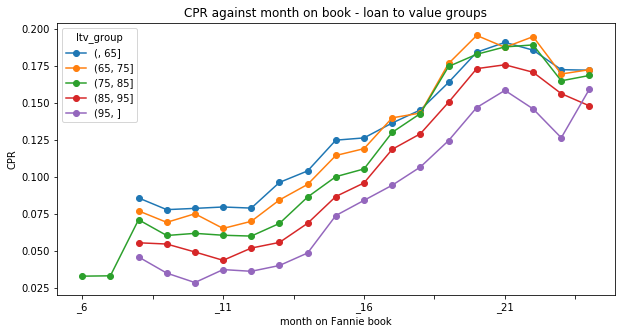

In [154]:
ltv_cprB.set_index('ltv_group').T.plot(style = '-o',figsize=(10, 5))
plt.xlabel('month on Fannie book')
plt.ylabel('CPR')
plt.title('CPR against month on book - loan to value groups')